<a href="https://colab.research.google.com/github/efendykn27/bird_classification_model/blob/main/BIrd_Classification_citra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Importing Libraries

In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Dropout,BatchNormalization,Flatten,Activation
from keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model
import os
import tensorflow as tf

# Dataset

In [ ]:
! mkdir dataset

In [ ]:
! cp /content/gdrive/MyDrive/Kuliah/TA/dataset/dataset_citra/dataset2.zip /content/dataset/
! unzip /content/dataset/dataset2.zip -d /content/dataset/

Archive:  /content/dataset/dataset2.zip
  inflating: /content/dataset/BURUNG HANTU/Burung_Hantu (1).jpeg  
  inflating: /content/dataset/BURUNG HANTU/Burung_Hantu (1).jpg  
  inflating: /content/dataset/BURUNG HANTU/Burung_Hantu (10).jpg  
  inflating: /content/dataset/BURUNG HANTU/Burung_Hantu (100).jpg  
  inflating: /content/dataset/BURUNG HANTU/Burung_Hantu (101).jpg  
  inflating: /content/dataset/BURUNG HANTU/Burung_Hantu (102).jpg  
  inflating: /content/dataset/BURUNG HANTU/Burung_Hantu (103).jpg  
  inflating: /content/dataset/BURUNG HANTU/Burung_Hantu (104).jpg  
  inflating: /content/dataset/BURUNG HANTU/Burung_Hantu (105).jpg  
 extracting: /content/dataset/BURUNG HANTU/Burung_Hantu (106).jpg  
  inflating: /content/dataset/BURUNG HANTU/Burung_Hantu (107).jpg  
  inflating: /content/dataset/BURUNG HANTU/Burung_Hantu (108).jpg  
  inflating: /content/dataset/BURUNG HANTU/Burung_Hantu (109).jpg  
  inflating: /content/dataset/BURUNG HANTU/Burung_Hantu (11).jpg  
 extracting: 

In [ ]:
! rm /content/dataset/dataset2.zip

# Preprocessing

## Mengumpulkan Variabel

In [ ]:
dataset ="/content/dataset"
file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(dataset):
    for name in files:
        full_path.append(os.path.join(path, name)) 
        tag.append(path.split('/')[-1])        
        file_name.append(name)

In [ ]:
import pandas as pd
df = pd.DataFrame({"path":full_path,'file_name':file_name,"tag":tag})
df.groupby(['path','file_name','tag']).size()

path                                                  file_name               tag            
/content/dataset/BURUNG HANTU/Burung_Hantu (1).jpeg   Burung_Hantu (1).jpeg   BURUNG HANTU       1
/content/dataset/BURUNG HANTU/Burung_Hantu (1).jpg    Burung_Hantu (1).jpg    BURUNG HANTU       1
/content/dataset/BURUNG HANTU/Burung_Hantu (10).jpg   Burung_Hantu (10).jpg   BURUNG HANTU       1
/content/dataset/BURUNG HANTU/Burung_Hantu (100).jpg  Burung_Hantu (100).jpg  BURUNG HANTU       1
/content/dataset/BURUNG HANTU/Burung_Hantu (101).jpg  Burung_Hantu (101).jpg  BURUNG HANTU       1
                                                                                                ..
/content/dataset/BURUNG PERKUTUT/perkutut (95).jpg    perkutut (95).jpg       BURUNG PERKUTUT    1
/content/dataset/BURUNG PERKUTUT/perkutut (96).jpg    perkutut (96).jpg       BURUNG PERKUTUT    1
/content/dataset/BURUNG PERKUTUT/perkutut (97).jpg    perkutut (97).jpg       BURUNG PERKUTUT    1
/content/datase

In [ ]:
df.head()

,path,file_name,tag
0,/content/dataset/BURUNG PARKIT/parkit (130).jpg,parkit (130).jpg,BURUNG PARKIT
1,/content/dataset/BURUNG PARKIT/parkit (20).jpg,parkit (20).jpg,BURUNG PARKIT
2,/content/dataset/BURUNG PARKIT/parkit (143).jpg,parkit (143).jpg,BURUNG PARKIT
3,/content/dataset/BURUNG PARKIT/parkit (99).jpg,parkit (99).jpg,BURUNG PARKIT
4,/content/dataset/BURUNG PARKIT/parkit (12).jpeg,parkit (12).jpeg,BURUNG PARKIT


## Melakukan split data

In [ ]:
from sklearn.model_selection import train_test_split
X= df['path']
y= df['tag']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=30)

X_test, X_val, y_test, y_val = train_test_split(
    X_test, y_test, test_size=0.5, random_state=30)

In [ ]:
df_train = pd.DataFrame({'path':X_train,'tag':y_train,'set':'train'})

df_validate = pd.DataFrame({'path':X_val,'tag':y_val,'set':'validation'})

df_test = pd.DataFrame({'path':X_test,'tag':y_test,'set':'test'})

In [ ]:
print('jumlah data train: ', len(df_train))
print('jumlah data validasi: ', len(df_validate))
print('jumlah data tes: ', len(df_test))

jumlah data train:  1237
jumlah data validasi:  155
jumlah data tes:  155


In [ ]:
df_all = df_train.append([df_test,df_validate]).reset_index(drop=1)

print(df_all.groupby(['set','tag']).size(),'\n')

df_all.sample(3)

set         tag            
test        BURUNG HANTU        32
            BURUNG JALAK        27
            BURUNG KEPODANG     18
            BURUNG LOVEBIRD     21
            BURUNG MERPATI      22
            BURUNG PARKIT       21
            BURUNG PERKUTUT     14
train       BURUNG HANTU       265
            BURUNG JALAK       207
            BURUNG KEPODANG    108
            BURUNG LOVEBIRD    187
            BURUNG MERPATI     175
            BURUNG PARKIT      187
            BURUNG PERKUTUT    108
validation  BURUNG HANTU        31
            BURUNG JALAK        24
            BURUNG KEPODANG     18
            BURUNG LOVEBIRD     18
            BURUNG MERPATI      28
            BURUNG PARKIT       25
            BURUNG PERKUTUT     11
dtype: int64 



<ipython-input-12-38e4f0239540>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_train.append([df_test,df_validate]).reset_index(drop=1)


,path,tag,set
1257,/content/dataset/BURUNG KEPODANG/kepodang (37)...,BURUNG KEPODANG,test
1390,/content/dataset/BURUNG HANTU/Burung_Hantu (21...,BURUNG HANTU,test
1093,/content/dataset/BURUNG PERKUTUT/perkutut (116...,BURUNG PERKUTUT,train


## Menyimpan data train,val,test ke folder baru

In [ ]:
os.makedirs("result_dataset")

In [ ]:
import shutil
from tqdm.notebook import tqdm as tq
for index, row in tq(df_all.iterrows()):
    
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join("/content/result_dataset",row['tag'],row['image'].split('.')[0])            
    
    if os.path.exists(os.path.join("/content/result_dataset",row['set'],row['tag'])) == False:
        os.makedirs(os.path.join("/content/result_dataset",row['set'],row['tag']))
    
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join("/content/result_dataset",row['set'],row['tag'],destination_file_name)
    
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

0it [00:00, ?it/s]

In [ ]:
#Ininialisasi Direktori
train_directory='../content/result_dataset/train'
val_directory='../content/result_dataset/validation'
test_directory='../content/result_dataset/test'

In [ ]:
# Rescaling the Images untuk normalisasi
train_datagen=ImageDataGenerator(rescale=1/255)
val_datagen=ImageDataGenerator(rescale=1/255)
test_datagen=ImageDataGenerator(rescale=1/255)

In [ ]:
#Using the flow from directory function for reading the images
#fungsi flow_from_directory() digunakan untuk setting dimana model dapat memperoleh data
train_generator=train_datagen.flow_from_directory(train_directory,
                                                  target_size=(224,224),
                                                  color_mode='rgb',
                                                  batch_size=64,
                                                  class_mode='sparse')
val_generator=val_datagen.flow_from_directory(val_directory,
                                              target_size=(224,224),
                                              batch_size=64,
                                              color_mode='rgb',
                                              class_mode='sparse')
test_generator=test_datagen.flow_from_directory(test_directory,
                                                batch_size=64,
                                                target_size=(224,224),
                                                color_mode='rgb',
                                                class_mode='sparse')

Found 1181 images belonging to 7 classes.
Found 149 images belonging to 7 classes.
Found 148 images belonging to 7 classes.


In [ ]:
#the dictionary 
num_classes=(len(train_generator.class_indices))
print(num_classes)
train_generator.class_indices

7


{'BURUNG HANTU': 0,
 'BURUNG JALAK': 1,
 'BURUNG KEPODANG': 2,
 'BURUNG LOVEBIRD': 3,
 'BURUNG MERPATI': 4,
 'BURUNG PARKIT': 5,
 'BURUNG PERKUTUT': 6}

In [ ]:
# load pickle module
import pickle

# create a binary pickle file 
f = open("num_12class_bird.pkl","wb")

# write the python object (dict) to pickle file
pickle.dump(train_generator.class_indices,f)

# close file
f.close()

pickle_inn = open('num_12class_bird.pkl','rb')
classes_bird = pickle.load(pickle_inn)

In [ ]:
print(classes_bird)

{'BURUNG CENDRAWASIH': 0, 'BURUNG ELANG': 1, 'BURUNG ENGGANG': 2, 'BURUNG GELATIK': 3, 'BURUNG GEREJA': 4, 'BURUNG HANTU': 5, 'BURUNG JALAK': 6, 'BURUNG JALAK BALI': 7, 'BURUNG KACER': 8, 'BURUNG KAKATUA': 9, 'BURUNG KENARI': 10, 'BURUNG KOLIBRI': 11, 'BURUNG LOVEBIRD': 12, 'BURUNG MERPATI': 13, 'BURUNG MURAI': 14, 'BURUNG PLECI': 15}


# Training 

## Inception

In [ ]:
import keras 
from keras import applications
convlayerInc = keras.applications.InceptionV3(input_shape=(224,224,3),weights='imagenet', include_top=False, pooling='avg')
for layerInc in convlayerInc.layers:
    layerInc.trainable=False

87910968/87910968 [==============================] - 1s 0us/step


### Build model

In [ ]:
#Adding the layer to the Dense Layers
modelInc=Sequential()
modelInc.add(convlayerInc)
modelInc.add(Dropout(0.5))
modelInc.add(Flatten())
modelInc.add(BatchNormalization())
modelInc.add(Dense(2048,kernel_initializer='he_uniform'))
modelInc.add(BatchNormalization())
modelInc.add(Activation('relu'))
modelInc.add(Dropout(0.5))
modelInc.add(Dense(1024,kernel_initializer='he_uniform'))
modelInc.add(BatchNormalization())
modelInc.add(Activation('relu'))
modelInc.add(Dropout(0.5))
modelInc.add(Dense(num_classes,activation='softmax',kernel_initializer='glorot_uniform'))
print(modelInc.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 batch_normalization_94 (Bat  (None, 2048)             8192      
 chNormalization)                                                
                                                                 
 dense (Dense)               (None, 2048)              4196352   
                                                                 
 batch_normalization_95 (Bat  (None, 2048)             8192      
 chNormalization)                                       

### Fine-Tuning the Model

In [ ]:
os.makedirs("result_model")

In [ ]:
from tensorflow import keras
from keras import optimizers

optimizer=keras.optimizers.Adam(learning_rate=0.0001)
modelInc.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#checkpoint = keras.callbacks.ModelCheckpoint('/content/result_model/model{epoch:08d}.h5', save_freq=1,monitor='val_accuracy' ,verbose=1) 
historyInc=modelInc.fit(train_generator,epochs=30,validation_data=val_generator)#, callbacks=checkpoint

Epoch 1/30
19/19 [==============================] - 35s 806ms/step - loss: 2.0925 - accuracy: 0.2837 - val_loss: 1.1631 - val_accuracy: 0.6040
Epoch 2/30
19/19 [==============================] - 8s 435ms/step - loss: 1.2991 - accuracy: 0.5504 - val_loss: 0.7951 - val_accuracy: 0.7718
Epoch 3/30
19/19 [==============================] - 9s 491ms/step - loss: 0.9710 - accuracy: 0.6655 - val_loss: 0.5998 - val_accuracy: 0.8188
Epoch 4/30
19/19 [==============================] - 10s 518ms/step - loss: 0.7585 - accuracy: 0.7468 - val_loss: 0.4938 - val_accuracy: 0.8658
Epoch 5/30
19/19 [==============================] - 8s 434ms/step - loss: 0.6579 - accuracy: 0.7477 - val_loss: 0.4121 - val_accuracy: 0.8859
Epoch 6/30
19/19 [==============================] - 11s 563ms/step - loss: 0.5898 - accuracy: 0.8010 - val_loss: 0.3617 - val_accuracy: 0.8993
Epoch 7/30
19/19 [==============================] - 11s 575ms/step - loss: 0.5015 - accuracy: 0.8323 - val_loss: 0.3274 - val_accuracy: 0.9060
Ep

### Testing the Model

In [ ]:
modelInc.evaluate(test_generator)

3/3 [==============================] - 3s 1s/step - loss: 0.1373 - accuracy: 0.9662


[0.1373046338558197, 0.9662162065505981]

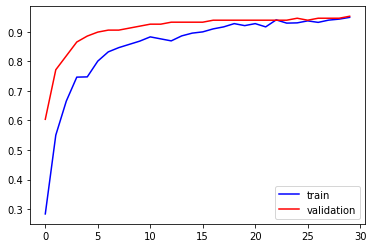

In [ ]:
plt.plot(historyInc.history['accuracy'],c='b',label='train')
plt.plot(historyInc.history['val_accuracy'],c='r',label='validation')
plt.legend(loc='lower right')
plt.show()

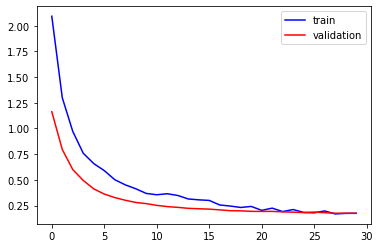

In [ ]:
plt.plot(historyInc.history['loss'],c='b',label='train')
plt.plot(historyInc.history['val_loss'],c='r',label='validation')
plt.legend(loc='upper right')
plt.show()



In [ ]:
training_accuracy_Inception     = historyInc.history['accuracy'][-1]
training_loss_Inception        = historyInc.history['loss'][-1]
validation_accuracy_Inception    = historyInc.history['val_accuracy'][-1]
validation_loss_Inception      = historyInc.history['val_loss'][-1]
print("Training Accuracy Inception   :", training_accuracy_Inception )
print("Training Loss Inception       :", training_loss_Inception)
print("Validation Accuracy Inception :", validation_accuracy_Inception)
print("Validation Loss Inception     :", validation_loss_Inception)



Training Accuracy Inception   : 0.9491956233978271
Training Loss Inception       : 0.1741844117641449
Validation Accuracy Inception : 0.9530201554298401
Validation Loss Inception     : 0.17441847920417786


###Save Model

In [ ]:
modelInc.save_weights("modelInception.h5")

### Inferencing Using the Model

In [ ]:
from tensorflow.keras.models import load_model
MODEL_PATH1 = '/content/result_model/modelInception.h5'
model1 = load_model(MODEL_PATH1,compile=False)

In [ ]:
import pickle
pickle_inn = open('/content/num_12class_bird.pkl','rb')
classes_bird = pickle.load(pickle_inn)

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array 
def predictInc(dir):
    img=keras.utils.load_img(dir,target_size=(224,224))
    img1=keras.utils.img_to_array(img)
    img1=img1/255
    img1=np.expand_dims(img1,[0])
    plt.imshow(img)
    predict=modelInc.predict(img1)
    classes=np.argmax(predict,axis=1)
    for key,values in classes_bird.items():
        if classes==values:
          print(classes)
          print("The predicted image of the bird is: "+str(key)+" with a probability of "+str(round(np.max(modelInc.predict(img1))*100,2))+"%")

1/1 [==============================] - 2s 2s/step
[5]
1/1 [==============================] - 0s 37ms/step
The predicted image of the bird is: BURUNG PARKIT with a probability of 96.58%


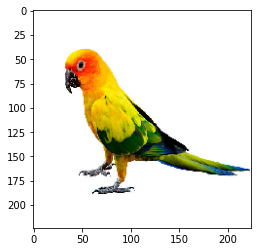

In [ ]:
predictInc('/content/result_dataset/test/BURUNG PARKIT/parkit (203).jpg')

1/1 [==============================] - 0s 32ms/step
[3]
1/1 [==============================] - 0s 33ms/step
The predicted image of the bird is: BURUNG LOVEBIRD with a probability of 99.87%


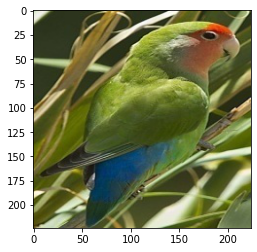

In [ ]:
predictInc('/content/result_dataset/test/BURUNG LOVEBIRD/080.jpg')

1/1 [==============================] - 0s 34ms/step
[6]
1/1 [==============================] - 0s 34ms/step
The predicted image of the bird is: BURUNG PERKUTUT with a probability of 58.94%


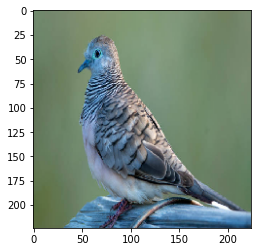

In [ ]:
predictInc('/content/result_dataset/test/BURUNG PERKUTUT/perkutut (92).jpg')

In [ ]:
! cp /content/num_20class_bird.pkl /content/gdrive/MyDrive/Kuliah/TA/model_citra

In [ ]:
! cp /content/result_model/modelInception.h5 /content/gdrive/MyDrive/Kuliah/TA/model_citra

## MobileNet


In [ ]:
import keras 
from keras import applications
convlayerMob = keras.applications.MobileNet(input_shape=(224,224,3),weights='imagenet', include_top=False, pooling='avg')
for layerMob in convlayerMob.layers:
    layerMob.trainable=False

17225924/17225924 [==============================] - 0s 0us/step


### Build model

In [ ]:
#Adding the layer to the Dense Layers
modelMob=Sequential()
modelMob.add(convlayerMob)
modelMob.add(Dropout(0.5))
modelMob.add(Flatten())
modelMob.add(BatchNormalization())
modelMob.add(Dense(2048,kernel_initializer='he_uniform'))
modelMob.add(BatchNormalization())
modelMob.add(Activation('relu'))
modelMob.add(Dropout(0.5))
modelMob.add(Dense(1024,kernel_initializer='he_uniform'))
modelMob.add(BatchNormalization())
modelMob.add(Activation('relu'))
modelMob.add(Dropout(0.5))
modelMob.add(Dense(num_classes,activation='softmax',kernel_initializer='glorot_uniform'))
print(modelMob.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 1024)             3228864   
 nal)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 1024)              0         
                                                                 
 flatten_2 (Flatten)         (None, 1024)              0         
                                                                 
 batch_normalization_100 (Ba  (None, 1024)             4096      
 tchNormalization)                                               
                                                                 
 dense_6 (Dense)             (None, 2048)              2099200   
                                                                 
 batch_normalization_101 (Ba  (None, 2048)            

### Fine-Tuning the Model

In [ ]:
os.makedirs("result_model")

In [ ]:
from tensorflow import keras
from keras import optimizers

optimizer=keras.optimizers.Adam(learning_rate=0.0001)
modelMob.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#checkpoint = keras.callbacks.ModelCheckpoint('/content/result_model/model{epoch:08d}.h5', period=1,monitor='val_accuracy' ,verbose=1) 
historyMob=modelMob.fit(train_generator,epochs=30,validation_data=val_generator)#, callbacks=checkpoint

Epoch 1/30
19/19 [==============================] - 17s 569ms/step - loss: 2.4536 - accuracy: 0.1804 - val_loss: 1.6618 - val_accuracy: 0.3557
Epoch 2/30
19/19 [==============================] - 9s 492ms/step - loss: 1.8546 - accuracy: 0.3404 - val_loss: 1.1034 - val_accuracy: 0.5973
Epoch 3/30
19/19 [==============================] - 10s 519ms/step - loss: 1.4797 - accuracy: 0.4767 - val_loss: 0.8354 - val_accuracy: 0.7047
Epoch 4/30
19/19 [==============================] - 8s 433ms/step - loss: 1.2255 - accuracy: 0.5605 - val_loss: 0.6607 - val_accuracy: 0.7919
Epoch 5/30
19/19 [==============================] - 9s 490ms/step - loss: 1.0681 - accuracy: 0.6232 - val_loss: 0.5406 - val_accuracy: 0.8456
Epoch 6/30
19/19 [==============================] - 10s 537ms/step - loss: 0.8795 - accuracy: 0.6732 - val_loss: 0.4657 - val_accuracy: 0.8658
Epoch 7/30
19/19 [==============================] - 8s 422ms/step - loss: 0.8290 - accuracy: 0.6960 - val_loss: 0.4073 - val_accuracy: 0.8859
Epo

### Testing the Model

In [ ]:
modelMob.evaluate(test_generator)

3/3 [==============================] - 1s 542ms/step - loss: 0.1539 - accuracy: 0.9662


[0.15390802919864655, 0.9662162065505981]

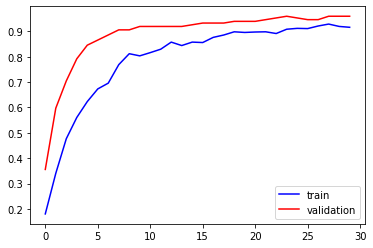

In [ ]:
plt.plot(historyMob.history['accuracy'],c='b',label='train')
plt.plot(historyMob.history['val_accuracy'],c='r',label='validation')
plt.legend(loc='lower right')
plt.show()

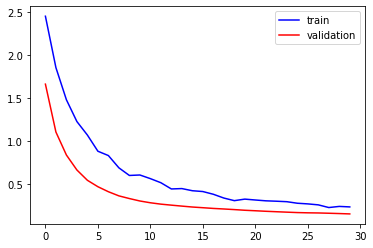

In [ ]:
plt.plot(historyMob.history['loss'],c='b',label='train')
plt.plot(historyMob.history['val_loss'],c='r',label='validation')
plt.legend(loc='upper right')
plt.show()



In [ ]:
training_accuracy_MobileNet      = historyMob.history['accuracy'][-1]
training_loss_MobileNet       = historyMob.history['loss'][-1]
validation_accuracy_MobileNet  = historyMob.history['val_accuracy'][-1]
validation_loss_MobileNet        = historyMob.history['val_loss'][-1]
print("Training Accuracy MobileNet   :", training_accuracy_MobileNet )
print("Training Loss MobileNet       :", training_loss_MobileNet)
print("Validation Accuracy MobileNet :", validation_accuracy_MobileNet)
print("Validation Loss MobileNet     :", validation_loss_MobileNet)



Training Accuracy MobileNet   : 0.9161727428436279
Training Loss MobileNet       : 0.23021231591701508
Validation Accuracy MobileNet : 0.9597315192222595
Validation Loss MobileNet     : 0.14851337671279907


###Save Model

In [ ]:
modelMob.save_weights("modelMobileNet.h5")

### Inferencing Using the Model

In [ ]:
from tensorflow.keras.models import load_model
MODEL_PATH2 = '/content/result_model/modelMobileNet.h5'
model2 = load_model(MODEL_PATH2,compile=False)

In [ ]:
import pickle
pickle_inn = open('/content/num_12class_bird.pkl','rb')
classes_bird = pickle.load(pickle_inn)

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array 
def predictMob(dir):
    img=keras.utils.load_img(dir,target_size=(224,224))
    img1=keras.utils.img_to_array(img)
    img1=img1/255
    img1=np.expand_dims(img1,[0])
    plt.imshow(img)
    predict=modelMob.predict(img1)
    classes=np.argmax(predict,axis=1)
    for key,values in classes_bird.items():
        if classes==values:
          print(classes)
          print("The predicted image of the bird is: "+str(key)+" with a probability of "+str(round(np.max(modelMob.predict(img1))*100,2))+"%")

1/1 [==============================] - 1s 744ms/step
[5]
1/1 [==============================] - 0s 26ms/step
The predicted image of the bird is: BURUNG PARKIT with a probability of 98.42%


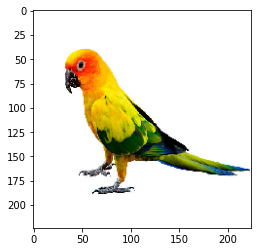

In [ ]:
predictMob('/content/result_dataset/test/BURUNG PARKIT/parkit (203).jpg')

1/1 [==============================] - 0s 24ms/step
[3]
1/1 [==============================] - 0s 23ms/step
The predicted image of the bird is: BURUNG LOVEBIRD with a probability of 99.6%


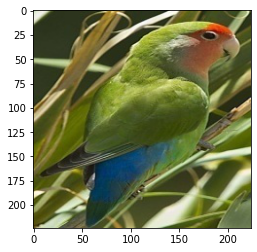

In [ ]:
predictMob('/content/result_dataset/test/BURUNG LOVEBIRD/080.jpg')

1/1 [==============================] - 0s 25ms/step
[6]
1/1 [==============================] - 0s 25ms/step
The predicted image of the bird is: BURUNG PERKUTUT with a probability of 58.19%


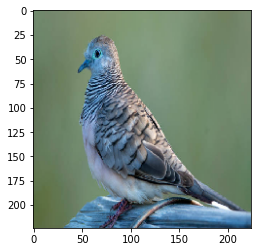

In [ ]:
predictMob('/content/result_dataset/test/BURUNG PERKUTUT/perkutut (92).jpg')

In [ ]:
! cp /content/num_20class_bird.pkl /content/gdrive/MyDrive/Kuliah/TA/model_citra

In [ ]:
! cp /content/result_model/modelMobileNet.h5 /content/gdrive/MyDrive/Kuliah/TA/model_citra

## VGG16

In [ ]:
import keras 
from keras import applications
convlayerVGG = keras.applications.VGG16(input_shape=(224,224,3),weights='imagenet', include_top=False, pooling='avg')
for layerVGG in convlayerVGG.layers:
    layerVGG.trainable=False

58889256/58889256 [==============================] - 0s 0us/step


### Build model

In [ ]:
#Adding the layer to the Dense Layers
modelVGG=Sequential()
modelVGG.add(convlayerVGG)
modelVGG.add(Dropout(0.5))
modelVGG.add(Flatten())
modelVGG.add(BatchNormalization())
modelVGG.add(Dense(2048,kernel_initializer='he_uniform'))
modelVGG.add(BatchNormalization())
modelVGG.add(Activation('relu'))
modelVGG.add(Dropout(0.5))
modelVGG.add(Dense(1024,kernel_initializer='he_uniform'))
modelVGG.add(BatchNormalization())
modelVGG.add(Activation('relu'))
modelVGG.add(Dropout(0.5))
modelVGG.add(Dense(num_classes,activation='softmax',kernel_initializer='glorot_uniform'))
print(modelVGG.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 flatten_3 (Flatten)         (None, 512)               0         
                                                                 
 batch_normalization_103 (Ba  (None, 512)              2048      
 tchNormalization)                                               
                                                                 
 dense_9 (Dense)             (None, 2048)              1050624   
                                                                 
 batch_normalization_104 (Ba  (None, 2048)             8192      
 tchNormalization)                                    

### Fine-Tuning the Model

In [ ]:
os.makedirs("result_model")

In [ ]:
from tensorflow import keras
from keras import optimizers

optimizer=keras.optimizers.Adam(learning_rate=0.0001)
modelVGG.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#checkpoint = keras.callbacks.ModelCheckpoint('/content/result_model/model{epoch:08d}.h5', period=1,monitor='val_accuracy' ,verbose=1) 
historyVGG=modelVGG.fit(train_generator,epochs=30,validation_data=val_generator)#, callbacks=checkpoint

Epoch 1/30
19/19 [==============================] - 25s 908ms/step - loss: 2.5978 - accuracy: 0.1600 - val_loss: 1.9030 - val_accuracy: 0.1007
Epoch 2/30
19/19 [==============================] - 9s 477ms/step - loss: 2.1472 - accuracy: 0.2472 - val_loss: 1.7787 - val_accuracy: 0.3221
Epoch 3/30
19/19 [==============================] - 10s 527ms/step - loss: 1.8910 - accuracy: 0.3226 - val_loss: 1.6808 - val_accuracy: 0.4765
Epoch 4/30
19/19 [==============================] - 10s 528ms/step - loss: 1.7236 - accuracy: 0.3920 - val_loss: 1.5925 - val_accuracy: 0.5638
Epoch 5/30
19/19 [==============================] - 11s 561ms/step - loss: 1.6142 - accuracy: 0.4157 - val_loss: 1.5257 - val_accuracy: 0.5906
Epoch 6/30
19/19 [==============================] - 10s 529ms/step - loss: 1.5340 - accuracy: 0.4420 - val_loss: 1.4677 - val_accuracy: 0.5906
Epoch 7/30
19/19 [==============================] - 10s 551ms/step - loss: 1.4486 - accuracy: 0.4886 - val_loss: 1.4134 - val_accuracy: 0.5973


### Testing the Model

In [ ]:
modelVGG.evaluate(test_generator)

3/3 [==============================] - 3s 1s/step - loss: 0.5601 - accuracy: 0.8243


[0.5600739121437073, 0.8243243098258972]

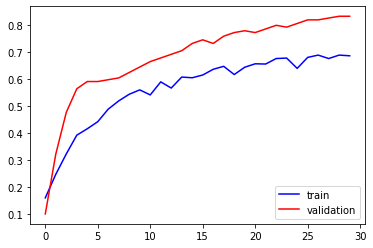

In [ ]:
plt.plot(historyVGG.history['accuracy'],c='b',label='train')
plt.plot(historyVGG.history['val_accuracy'],c='r',label='validation')
plt.legend(loc='lower right')
plt.show()

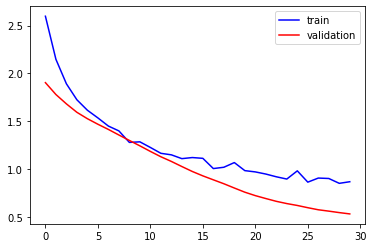

In [ ]:
plt.plot(historyVGG.history['loss'],c='b',label='train')
plt.plot(historyVGG.history['val_loss'],c='r',label='validation')
plt.legend(loc='upper right')
plt.show()



In [ ]:
training_accuracy_VGG      = historyVGG.history['accuracy'][-1]
training_loss_VGG        = historyVGG.history['loss'][-1]
validation_accuracy_VGG    = historyVGG.history['val_accuracy'][-1]
validation_loss_VGG       = historyVGG.history['val_loss'][-1]
print("Training Accuracy VGG16    :", training_accuracy_VGG )
print("Training Loss VGG16        :", training_loss_VGG)
print("Validation Accuracy VGG16  :", validation_accuracy_VGG)
print("Validation Loss VGG16      :", validation_loss_VGG)



Training Accuracy VGG16    : 0.6858594417572021
Training Loss VGG16        : 0.8661722540855408
Validation Accuracy VGG16  : 0.8322147727012634
Validation Loss VGG16      : 0.5293576121330261


###Save Model

In [ ]:
modelVGG.save_weights("modelVGG.h5")

### Inferencing Using the Model

In [ ]:
from tensorflow.keras.models import load_model
MODEL_PATH3 = '/content/result_model/modelVGG.h5'
model3 = load_model(MODEL_PATH3,compile=False)

In [ ]:
import pickle
pickle_inn = open('/content/num_12class_bird.pkl','rb')
classes_bird = pickle.load(pickle_inn)

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array 
def predictVGG(dir):
    img=keras.utils.load_img(dir,target_size=(224,224))
    img1=keras.utils.img_to_array(img)
    img1=img1/255
    img1=np.expand_dims(img1,[0])
    plt.imshow(img)
    predict=modelVGG.predict(img1)
    classes=np.argmax(predict,axis=1)
    for key,values in classes_bird.items():
        if classes==values:
          print(classes)
          print("The predicted image of the bird is: "+str(key)+" with a probability of "+str(round(np.max(modelVGG.predict(img1))*100,2))+"%")

1/1 [==============================] - 1s 853ms/step
[5]
1/1 [==============================] - 0s 21ms/step
The predicted image of the bird is: BURUNG PARKIT with a probability of 98.07%


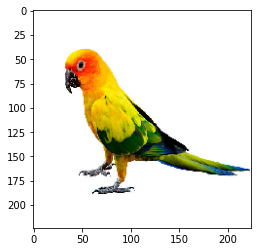

In [ ]:
predictVGG('/content/result_dataset/test/BURUNG PARKIT/parkit (203).jpg')

1/1 [==============================] - 0s 24ms/step
[3]
1/1 [==============================] - 0s 29ms/step
The predicted image of the bird is: BURUNG LOVEBIRD with a probability of 82.33%


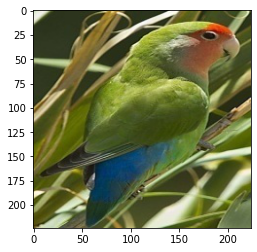

In [ ]:
predictVGG('/content/result_dataset/test/BURUNG LOVEBIRD/080.jpg')

1/1 [==============================] - 0s 23ms/step
[4]
1/1 [==============================] - 0s 20ms/step
The predicted image of the bird is: BURUNG MERPATI with a probability of 65.5%


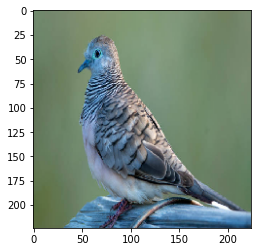

In [ ]:
predictVGG('/content/result_dataset/test/BURUNG PERKUTUT/perkutut (92).jpg')

In [ ]:
! cp /content/num_20class_bird.pkl /content/gdrive/MyDrive/Kuliah/TA/model_citra

In [ ]:
! cp /content/result_model/modelVGG.h5 /content/gdrive/MyDrive/Kuliah/TA/model_citra

## Resnet

In [ ]:
import keras 
from keras import applications
convlayerResnet = keras.applications.resnet_v2.ResNet50V2(input_shape=(224,224,3),weights='imagenet', include_top=False, pooling='avg')
for layerResnet in convlayerResnet.layers:
    layerResnet.trainable=False

94668760/94668760 [==============================] - 1s 0us/step


### Build model

In [ ]:
#Adding the layer to the Dense Layers
modelResnet=Sequential()
modelResnet.add(convlayerResnet)
modelResnet.add(Dropout(0.5))
modelResnet.add(Flatten())
modelResnet.add(BatchNormalization())
modelResnet.add(Dense(2048,kernel_initializer='he_uniform'))
modelResnet.add(BatchNormalization())
modelResnet.add(Activation('relu'))
modelResnet.add(Dropout(0.5))
modelResnet.add(Dense(1024,kernel_initializer='he_uniform'))
modelResnet.add(BatchNormalization())
modelResnet.add(Activation('relu'))
modelResnet.add(Dropout(0.5))
modelResnet.add(Dense(num_classes,activation='softmax',kernel_initializer='glorot_uniform'))
print(modelResnet.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 dropout_3 (Dropout)         (None, 2048)              0         
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 batch_normalization_97 (Bat  (None, 2048)             8192      
 chNormalization)                                                
                                                                 
 dense_3 (Dense)             (None, 2048)              4196352   
                                                                 
 batch_normalization_98 (Bat  (None, 2048)             8192      
 chNormalization)                                     

### Fine-Tuning the Model

In [ ]:
os.makedirs("result_model")

In [ ]:
from tensorflow import keras
from keras import optimizers

optimizer=keras.optimizers.Adam(learning_rate=0.0001)
modelResnet.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#checkpoint = keras.callbacks.ModelCheckpoint('/content/result_model/model{epoch:08d}.h5', period=1,monitor='val_accuracy' ,verbose=1) 
historyResnet=modelResnet.fit(train_generator,epochs=30,validation_data=val_generator)#, callbacks=checkpoint

Epoch 1/30
19/19 [==============================] - 21s 643ms/step - loss: 2.1084 - accuracy: 0.2710 - val_loss: 1.2910 - val_accuracy: 0.5638
Epoch 2/30
19/19 [==============================] - 9s 461ms/step - loss: 1.4015 - accuracy: 0.5114 - val_loss: 0.8538 - val_accuracy: 0.7584
Epoch 3/30
19/19 [==============================] - 10s 510ms/step - loss: 0.9989 - accuracy: 0.6562 - val_loss: 0.6003 - val_accuracy: 0.8389
Epoch 4/30
19/19 [==============================] - 10s 516ms/step - loss: 0.7838 - accuracy: 0.7333 - val_loss: 0.4543 - val_accuracy: 0.8926
Epoch 5/30
19/19 [==============================] - 9s 448ms/step - loss: 0.6572 - accuracy: 0.7756 - val_loss: 0.3749 - val_accuracy: 0.8926
Epoch 6/30
19/19 [==============================] - 10s 486ms/step - loss: 0.5497 - accuracy: 0.8247 - val_loss: 0.3240 - val_accuracy: 0.9128
Epoch 7/30
19/19 [==============================] - 10s 507ms/step - loss: 0.4585 - accuracy: 0.8510 - val_loss: 0.2923 - val_accuracy: 0.9396
E

### Testing the Model

In [ ]:
modelResnet.evaluate(test_generator)

3/3 [==============================] - 2s 697ms/step - loss: 0.1618 - accuracy: 0.9459


[0.16183346509933472, 0.9459459185600281]

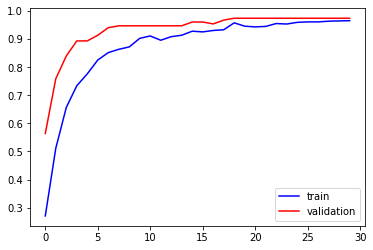

In [ ]:
plt.plot(historyResnet.history['accuracy'],c='b',label='train')
plt.plot(historyResnet.history['val_accuracy'],c='r',label='validation')
plt.legend(loc='lower right')
plt.show()

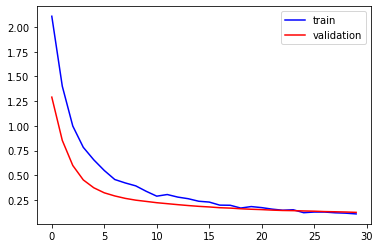

In [ ]:
plt.plot(historyResnet.history['loss'],c='b',label='train')
plt.plot(historyResnet.history['val_loss'],c='r',label='validation')
plt.legend(loc='upper right')
plt.show()



In [ ]:
training_accuracy_resnet      = historyResnet.history['accuracy'][-1]
training_loss_resnet          = historyResnet.history['loss'][-1]
validation_accuracy_resnet    = historyResnet.history['val_accuracy'][-1]
validation_loss_resnet        = historyResnet.history['val_loss'][-1]
print("Training Accuracy ResNet   :", training_accuracy_resnet )
print("Training Loss ResNet       :", training_loss_resnet)
print("Validation Accuracy ResNet :", validation_accuracy_resnet)
print("Validation Loss ResNet     :", validation_loss_resnet)



Training Accuracy ResNet   : 0.9644368886947632
Training Loss ResNet       : 0.11069739609956741
Validation Accuracy ResNet : 0.9731543660163879
Validation Loss ResNet     : 0.12623727321624756


###Save Model

In [ ]:
modelResnet.save_weights("modelResnet.h5")

### Inferencing Using the Model

In [ ]:
from tensorflow.keras.models import load_model
MODEL_PATH4 = '/content/result_model/modelResnet.h5'
model4 = load_model(MODEL_PATH4,compile=False)

In [ ]:
import pickle
pickle_inn = open('/content/num_12class_bird.pkl','rb')
classes_bird = pickle.load(pickle_inn)

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array 
def predictResNet(dir):
    img=keras.utils.load_img(dir,target_size=(224,224))
    img1=keras.utils.img_to_array(img)
    img1=img1/255
    img1=np.expand_dims(img1,[0])
    plt.imshow(img)
    predict=modelResnet.predict(img1)
    classes=np.argmax(predict,axis=1)
    for key,values in classes_bird.items():
        if classes==values:
          print(classes)
          print("The predicted image of the bird is: "+str(key)+" with a probability of "+str(round(np.max(modelResnet.predict(img1))*100,2))+"%")

1/1 [==============================] - 1s 1s/step
[5]
1/1 [==============================] - 0s 30ms/step
The predicted image of the bird is: BURUNG PARKIT with a probability of 92.49%


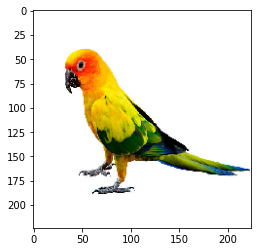

In [ ]:
predictResNet('/content/result_dataset/test/BURUNG PARKIT/parkit (203).jpg')

1/1 [==============================] - 0s 30ms/step
[3]
1/1 [==============================] - 0s 32ms/step
The predicted image of the bird is: BURUNG LOVEBIRD with a probability of 99.9%


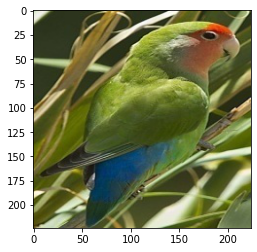

In [ ]:
predictResNet('/content/result_dataset/test/BURUNG LOVEBIRD/080.jpg')

1/1 [==============================] - 0s 28ms/step
[6]
1/1 [==============================] - 0s 29ms/step
The predicted image of the bird is: BURUNG PERKUTUT with a probability of 90.32%


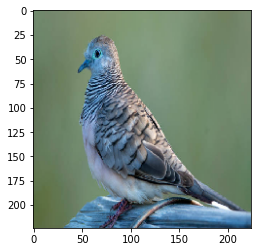

In [ ]:
predictResNet('/content/result_dataset/test/BURUNG PERKUTUT/perkutut (92).jpg')

In [ ]:
! cp /content/num_20class_bird.pkl /content/gdrive/MyDrive/Kuliah/TA/model_citra

In [ ]:
! cp /content/result_model/modelResnet.h5 /content/gdrive/MyDrive/Kuliah/TA/model_citra

## EfficientNet

In [ ]:
import keras 
from keras import applications
convlayerEff = keras.applications.EfficientNetB4(input_shape=(224,224,3),weights='imagenet', include_top=False, pooling='avg')
for layerEff in convlayerEff.layers:
    layerEff.trainable=False

71686520/71686520 [==============================] - 0s 0us/step


### Build model

In [ ]:
#Adding the layer to the Dense Layers
modelEff=Sequential()
modelEff.add(convlayerEff)
modelEff.add(Dropout(0.5))
modelEff.add(Flatten())
modelEff.add(BatchNormalization())
modelEff.add(Dense(2048,kernel_initializer='he_uniform'))
modelEff.add(BatchNormalization())
modelEff.add(Activation('relu'))
modelEff.add(Dropout(0.5))
modelEff.add(Dense(1024,kernel_initializer='he_uniform'))
modelEff.add(BatchNormalization())
modelEff.add(Activation('relu'))
modelEff.add(Dropout(0.5))
modelEff.add(Dense(num_classes,activation='softmax',kernel_initializer='glorot_uniform'))
print(modelEff.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb4 (Functional)  (None, 1792)             17673823  
                                                                 
 dropout_12 (Dropout)        (None, 1792)              0         
                                                                 
 flatten_4 (Flatten)         (None, 1792)              0         
                                                                 
 batch_normalization_106 (Ba  (None, 1792)             7168      
 tchNormalization)                                               
                                                                 
 dense_12 (Dense)            (None, 2048)              3672064   
                                                                 
 batch_normalization_107 (Ba  (None, 2048)             8192      
 tchNormalization)                                    

### Fine-Tuning the Model

In [ ]:
os.makedirs("result_model")

In [ ]:
from tensorflow import keras
from keras import optimizers

optimizer=keras.optimizers.Adam(learning_rate=0.0001)
modelEff.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
#checkpoint = keras.callbacks.ModelCheckpoint('/content/result_model/model{epoch:08d}.h5', period=1,monitor='val_accuracy' ,verbose=1) 
historyEff=modelEff.fit(train_generator,epochs=30,validation_data=val_generator)#, callbacks=checkpoint

Epoch 1/30
19/19 [==============================] - 31s 858ms/step - loss: 2.5629 - accuracy: 0.1609 - val_loss: 1.9536 - val_accuracy: 0.0940
Epoch 2/30
19/19 [==============================] - 11s 569ms/step - loss: 2.4718 - accuracy: 0.1702 - val_loss: 1.9543 - val_accuracy: 0.1678
Epoch 3/30
19/19 [==============================] - 11s 606ms/step - loss: 2.5002 - accuracy: 0.1617 - val_loss: 1.9717 - val_accuracy: 0.1678
Epoch 4/30
19/19 [==============================] - 10s 505ms/step - loss: 2.5198 - accuracy: 0.1685 - val_loss: 1.9857 - val_accuracy: 0.1879
Epoch 5/30
19/19 [==============================] - 10s 517ms/step - loss: 2.5061 - accuracy: 0.1744 - val_loss: 1.9982 - val_accuracy: 0.1477
Epoch 6/30
19/19 [==============================] - 11s 569ms/step - loss: 2.4434 - accuracy: 0.1727 - val_loss: 2.0027 - val_accuracy: 0.1611
Epoch 7/30
19/19 [==============================] - 10s 546ms/step - loss: 2.4828 - accuracy: 0.1626 - val_loss: 2.0036 - val_accuracy: 0.1611

### Testing the Model

In [ ]:
modelEff.evaluate(test_generator)

3/3 [==============================] - 2s 615ms/step - loss: 1.9500 - accuracy: 0.2027


[1.950012445449829, 0.20270270109176636]

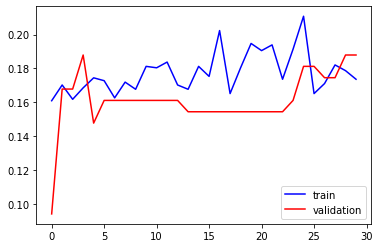

In [ ]:
plt.plot(historyEff.history['accuracy'],c='b',label='train')
plt.plot(historyEff.history['val_accuracy'],c='r',label='validation')
plt.legend(loc='lower right')
plt.show()

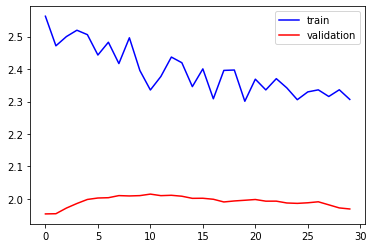

In [ ]:
plt.plot(historyEff.history['loss'],c='b',label='train')
plt.plot(historyEff.history['val_loss'],c='r',label='validation')
plt.legend(loc='upper right')
plt.show()



In [ ]:
training_accuracy_Eff     = historyEff.history['accuracy'][-1]
training_loss_Eff        = historyEff.history['loss'][-1]
validation_accuracy_Eff    = historyEff.history['val_accuracy'][-1]
validation_loss_Eff       = historyEff.history['val_loss'][-1]
print("Training Accuracy EfficientNet   :", training_accuracy_Eff)
print("Training Loss EfficientNet       :", training_loss_Eff)
print("Validation Accuracy EfficientNet :", validation_accuracy_Eff)
print("Validation Loss EfficientNet     :", validation_loss_Eff)



Training Accuracy EfficientNet   : 0.17358170449733734
Training Loss EfficientNet       : 2.3065013885498047
Validation Accuracy EfficientNet : 0.1879194676876068
Validation Loss EfficientNet     : 1.9688447713851929


###Save Model

In [ ]:
modelEff.save_weights("modelEfficientNet.h5")

### Inferencing Using the Model

In [ ]:
from tensorflow.keras.models import load_model
MODEL_PATH5 = '/content/result_model/modelEfficientNet.h5'
model5 = load_model(MODEL_PATH5,compile=False)

In [ ]:
import pickle
pickle_inn = open('/content/num_12class_bird.pkl','rb')
classes_bird = pickle.load(pickle_inn)

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array 
def predictEff(dir):
    img=keras.utils.load_img(dir,target_size=(224,224))
    img1=keras.utils.img_to_array(img)
    img1=img1/255
    img1=np.expand_dims(img1,[0])
    plt.imshow(img)
    predict=modelEff.predict(img1)
    classes=np.argmax(predict,axis=1)
    for key,values in classes_bird.items():
        if classes==values:
          print(classes)
          print("The predicted image of the bird is: "+str(key)+" with a probability of "+str(round(np.max(modelEff.predict(img1))*100,2))+"%")

1/1 [==============================] - 3s 3s/step
[1]
1/1 [==============================] - 0s 48ms/step
The predicted image of the bird is: BURUNG JALAK with a probability of 23.24%


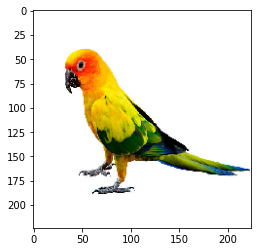

In [ ]:
predictEff('/content/result_dataset/test/BURUNG PARKIT/parkit (203).jpg')

1/1 [==============================] - 0s 46ms/step
[1]
1/1 [==============================] - 0s 40ms/step
The predicted image of the bird is: BURUNG JALAK with a probability of 22.75%


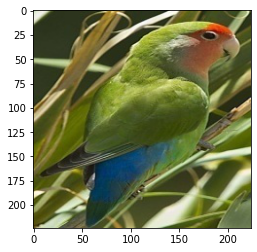

In [ ]:
predictEff('/content/result_dataset/test/BURUNG LOVEBIRD/080.jpg')

1/1 [==============================] - 0s 43ms/step
[1]
1/1 [==============================] - 0s 44ms/step
The predicted image of the bird is: BURUNG JALAK with a probability of 23.24%


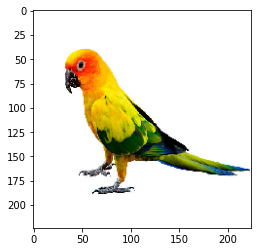

In [ ]:
predictEff('/content/result_dataset/test/BURUNG PARKIT/parkit (203).jpg')

In [ ]:
! cp /content/num_20class_bird.pkl /content/gdrive/MyDrive/Kuliah/TA/model_citra

In [ ]:
! cp /content/result_model/modelEfficientNet.h5 /content/gdrive/MyDrive/Kuliah/TA/model_citra